In [2]:
import pandas as pd
import numpy as np
from abc import ABC
from typing import Callable
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import math as ma
import random
import csv
from collections import Counter
import matplotlib.pyplot as plt

### Métricas de erro

In [ ]:
''''
class EvaluationErrorMetrics:
    
    def rmse(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        diff = (y_real - y_predicted) ** 2
        result = np.sqrt(diff.mean())
        return result
    
    def mae(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        diff = (y_real - y_predicted)
        result = np.abs(diff.mean())
        return result
    
    def mre(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        diff = (y_real - y_predicted)
        result = np.abs(diff.mean())
        return result''''

### Métricas de avaliação

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
class ClassificationMetrics:
    
    def accuracy(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        result = ((y_real == y_predicted).sum() / y_real.shape[0])
        return result 
    
    def precision(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        real = y_real.astype(bool)
        pred = y_predicted.astype(bool)
    
        T = real == 1
        F = ~T

        TP = pred[T].sum()
        FP = (~pred[F]).sum()

        result = (TP / (TP + FP))
        return result
    
    def recall(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        real = y_real.astype(bool)
        pred = y_predicted.astype(bool)
        
        T = real == True
        TP = pred[T].sum()
        FN = (~pred[T]).sum()
        
        result = (TP / (TP + FN))
        return result
    
    def f1_score(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        rec = ClassificationMetrics.recall(y_real, y_predicted)
        prec = ClassificationMetrics.precision(y_real, y_predicted)
        
        result = (2 * (float(rec) * float(prec)) / (float(rec) + float(prec)))
        return result

### Normalização e transformação de dados

In [6]:
class NormalizationData:
    
    def z_score(arr: np.ndarray):
        mean = arr.mean()
        std = arr.std()
        out = (arr - mean) / std
        return out
    
    def get_normalized(X, min, max):
        return (X - min) / (max - min)


In [ ]:
''''
class EncoderData:
    
    def encode(count, label):
        enco = np.zeros(count)
        enco[int(label)] = 1
        return enco
    
    def label_encoder(y): 
        count = int(y.max() + 1)
        return np.array([EncoderData.encode(count, label) for label in y])
    
    def label_decoder(y):
        return y.argmax(axis=1)''''

### Algoritmos K-Nearest Neighbors (KNN) e Árvore de Decisão

In [ ]:
'''
class MathDists():
    def euclidianDist(x1, x2):
        tam = len(x1) - 1
        s = 0
        for i in range(tam):
            s += math.pow(x1[i] - x2[i], 2)
        return math.sqrt(s)
    
    def mahalanobisDist(y=None, data=None, cov=None):
        y_mu = y - np.mean(data)
        if not cov:
            cov = np.cov(data.values.T)
        inv_covmat = np.linalg.inv(cov)
        left = np.dot(y_mu, inv_covmat)
        mahal = np.dot(letf, y_mu.T)
        return mahal.diagonal()
'''

In [7]:
class KNN2():
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.X_min = X.min(axis=0)
        self.X_max = X.max(axis=0)
        self.X_norm = NormalizationData.get_normalized(X, self.X_min, self.X_max)
        #self.X_norm = NormalizationData.z_score(x)
        
    def prediction(self, x):
        x = x.reshape(1, -1)
        dists = -2 * x @ self.X_norm.T + (x ** 2).sum(axis=1) + (self.X_norm ** 2).sum(axis=1)
        labeled_dists = np.c_[ dists.reshape(-1, 1), self.y ]
        ordered_dists = labeled_dists[np.argsort(labeled_dists[:, 0])]
        neighbors = ordered_dists[:self.k,:]
        neighbors_classes = neighbors[:, 1].flatten()
        return Counter(neighbors_classes).most_common(1)[0][0]
    
    def predict(self, X):
        #X_norm = NormalizationData.z_score(x)
        X_norm = NormalizationData.get_normalized(X, self.X_min, self.X_max)
        return np.apply_along_axis(self.prediction, 1, X_norm)

In [ ]:
'''
def distance(element,x):

    dist = 0
    for i in range(len(element)):
        dist += (element[i] - x[i])**2
    return math.sqrt(dist)
'''

In [ ]:
'''
class KNN():
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, x, y):
        self.X = x
        self.y = y
        #self.X_norm = NormalizationData.z_score(X)
        self.X_min = X.min(axis=0)
        self.X_max = X.max(axis=0)
        self.X_norm = NormalizationData.get_normalized(X, self.X_min, self.X_max)
        
    def prediction(self, e):
        
        min_distance = float('inf')
        class_most_close = 0
        idx_most_close = 0
        y_verification = [True]*len(self.y)
        
        for i in range(np.shape(self.X)[0]):
            current_distance = distance(e,self.X[i])
            
            if current_distance < min_distance and y_verification[i]:
                min_distance = current_distance
                class_most_close = self.y[i]
                idx_most_close = i
                
        y_verification[idx_most_close] = False
        return class_most_close #, y_verification
    
    def predict(self, X):
        #X_norm = NormalizationData.z_score(x)
        X_norm = NormalizationData.get_normalized(X, self.X_min, self.X_max)
        return np.apply_along_axis(self.prediction, 1, X_norm)
'''

"\nclass KNN():\n    def __init__(self, k=3):\n        self.k = k\n        \n    def fit(self, x, y):\n        self.X = x\n        self.y = y\n        #self.X_norm = NormalizationData.z_score(X)\n        self.X_min = X.min(axis=0)\n        self.X_max = X.max(axis=0)\n        self.X_norm = NormalizationData.get_normalized(X, self.X_min, self.X_max)\n        \n    def prediction(self, e):\n        \n        min_distance = float('inf')\n        class_most_close = 0\n        idx_most_close = 0\n        y_verification = [True]*len(self.y)\n        \n        for i in range(np.shape(self.X)[0]):\n            current_distance = distance(e,self.X[i])\n            \n            if current_distance < min_distance and y_verification[i]:\n                min_distance = current_distance\n                class_most_close = self.y[i]\n                idx_most_close = i\n                \n        y_verification[idx_most_close] = False\n        return class_most_close #, y_verification\n    \n    def pr

### Importação e separação de dados

In [43]:
df = pd.read_csv('/content/drive/MyDrive/1data/kc2.csv', delimiter=",", header=None) # erro no delimitador. Em pandas
new_df = df.drop_duplicates()

In [30]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,0.0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359.0,35.0,9.0,10.0,47.0,106.0,692.0,467.0,106.0,1.0
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174.0,15.0,34.0,5.0,23.0,67.0,343.0,232.0,65.0,1.0
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142.0,7.0,19.0,4.0,18.0,58.0,310.0,190.0,51.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,6.0,2.0,1.0,1.0,15.0,53.77,0.40,2.50,21.51,134.44,...,2.0,0.0,2.0,0.0,5.0,7.0,8.0,7.0,3.0,1.0
517,4.0,1.0,1.0,1.0,5.0,11.61,0.50,2.00,5.80,23.22,...,2.0,0.0,0.0,0.0,4.0,1.0,4.0,1.0,1.0,1.0
518,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,2.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,1.0,1.0
520,4.0,1.0,1.0,1.0,5.0,11.61,0.67,1.50,7.74,17.41,...,2.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,1.0,1.0


In [50]:
X = new_df.iloc[:,:-1].to_numpy() #converter para numpy
y = new_df.iloc[:,-1].to_numpy() #converter para numpy

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

### Treinamento do modelos

#### KNN

In [49]:
knn = KNN2(k = 5)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
#accuracy = ClassificationMetrics.accuracy(y_test, prediction)
#precision = ClassificationMetrics.precision(y_test, prediction)
#recall = ClassificationMetrics.recall(y_test, prediction)
#f1_score = ClassificationMetrics.f1_score(y_test, prediction)

In [34]:
accuracy = ClassificationMetrics.accuracy(y_test, prediction)
precision = ClassificationMetrics.precision(y_test, prediction)
recall = ClassificationMetrics.recall(y_test, prediction)
f1_score = ClassificationMetrics.f1_score(y_test, prediction)

In [35]:
print("------ KNN Metrics Results ------")
print("Accuracy Model: ", accuracy)
print("Precision Model: ", precision)
print("Recall Model: ", recall)
print("F1_score Model: ", f1_score)

------ KNN Metrics Results ------
Accuracy Model:  0.7345132743362832
Precision Model:  0.20481927710843373
Recall Model:  0.53125
F1_score Model:  0.29565217391304344


#### Árvore de Decisão

In [36]:
dt = DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)
prediction = dt.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, prediction)
precision = ClassificationMetrics.precision(y_test, prediction)
recall = ClassificationMetrics.recall(y_test, prediction)
f1_score = ClassificationMetrics.f1_score(y_test, prediction)

In [37]:
print("------ Decision Tree Metrics Results ------")
print("Accuracy Model: ", accuracy)
print("Precision Model: ", precision)
print("Recall Model: ", recall)
print("F1_score Model: ", f1_score)

------ Decision Tree Metrics Results ------
Accuracy Model:  0.7168141592920354
Precision Model:  0.19753086419753085
Recall Model:  0.5
F1_score Model:  0.2831858407079646


### Avaliação dos modelos com K folds

In [38]:
class Kfolds():
    
    def __init__(self, folds = 10):
        self.folds = folds
        
    def fold(self):
        
        np.random.shuffle(self.data)
        n = self.data.shape[0]
        self.n_folds = []
        folds_size = ma.ceil(n / self.folds)     
        for i in range(0, n, folds_size):
            end = i + folds_size
            end = n if end > n else end
            fold = self.data[i: end,:]
            self.n_folds.append(fold)
            
    def predict(self, index):
        folds = self.n_folds[:]
        
        test_fold = folds.pop(index)
        train_fold = np.vstack(folds)
        
        x_train = train_fold[:, :-1]
        y_train = train_fold[:, -1]
        x_test = test_fold[:, :-1]
        y_test = test_fold[:, -1]
        
        self.model.fit(x_train, y_train)
        pred = self.model.predict(x_test)
        
        return pred, y_test
    
    def folds_results_metrics(self):
        
        self.accuracies = []
        self.precisions = []
        self.recalls = []
        self.f1_score = []
        
        for i in range(self.folds):
            pred, y_test = self.predict(i)
            accuracy = ClassificationMetrics.accuracy(y_test, pred)
            precision = ClassificationMetrics.precision(y_test, pred)
            recall = ClassificationMetrics.recall(y_test, pred)
            f1_score = ClassificationMetrics.f1_score(y_test, pred)
            
            self.accuracies.append(accuracy)
            self.precisions.append(precision)
            self.recalls.append(recall)
            self.f1_score.append(f1_score)
            
        self.accurancy_mean = np.mean(self.accuracies)
        self.precision_mean = np.mean(self.precisions)
        self.recall_mean = np.mean(self.recalls)
        self.f1_score_mean = np.mean(self.f1_score)
        
        self.accurancy_std = np.std(self.accuracies)
        self.precision_std = np.std(self.precisions)
        self.recall_std = np.std(self.recalls)
        self.f1_score_std = np.std(self.f1_score)
        
    def fit_folds(self, model, x, y):
        self.data = np.c_[ x, y ]
        self.model = model
        self.fold()
        self.folds_results_metrics()

In [39]:
models = {
    'Árvore de Decisão' : dt
}
models_names = list(models.keys())

In [40]:
accuracies_means = []
precisions_means = []
f1_score_means = []
recalls_means = []

accuracies_stds = []
precisions_stds = []
f1_score_stds = []
recalls_stds = []

for model_name, model in models.items():
    kfolds = Kfolds()
    kfolds.fit_folds(model, X, y)

    accuracies_means.append(kfolds.accurancy_mean)
    precisions_means.append(kfolds.precision_mean)
    recalls_means.append(kfolds.recall_mean)
    f1_score_means.append(kfolds.f1_score_mean)

    accuracies_stds.append(kfolds.accurancy_std)
    precisions_stds.append(kfolds.precision_std)
    recalls_stds.append(kfolds.recall_std)
    f1_score_stds.append(kfolds.f1_score_std)

### Médias das métricas 

In [41]:
metrics = ["Acurácia", "Precisão", "Revocação", "F1-Score"]
dt_metrics_mean = np.array([accuracies_means, precisions_means, recalls_means, f1_score_means]).T
dt_metrics_std = np.array([accuracies_stds, precisions_stds, recalls_stds, f1_score_stds]).T

### Visualização dos resultados das métricas por modelo

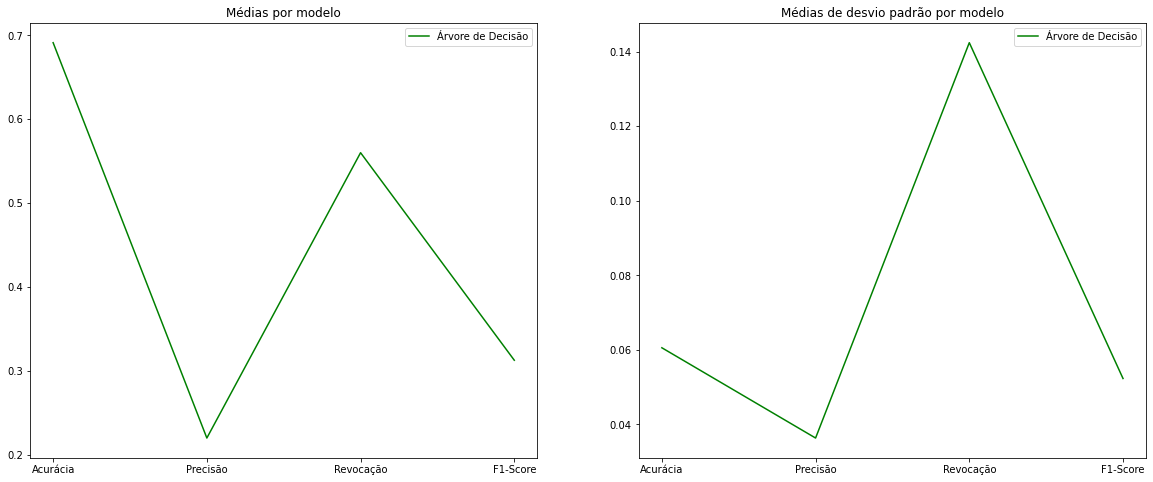

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

ax1.set_title("Médias por modelo")
ax1.plot(metrics, dt_metrics_mean[0], 'g', label="Árvore de Decisão")
#ax1.plot(metrics, gda_metrics_mean, 'b', label="Discriminante Gaussiano")
#ax1.plot(metrics, gnb_metrics_mean, 'r', label="Naive Bayes Gaussiano")
ax1.legend()

ax2.set_title("Médias de desvio padrão por modelo")
ax2.plot(metrics, dt_metrics_std[0], 'g', label="Árvore de Decisão")
#ax2.plot(metrics, gda_metrics_std, 'b', label="Discriminante Gaussiano")
#ax2.plot(metrics, gnb_metrics_std, 'r', label="Naive Bayes Gaussiano")
ax2.legend()